Solution to Homework 1 Q2 (Individual assignment)

reference for the dataset: https://www.kaggle.com/datasets/gagandeep16/car-sales
Target : 
The target is to to explore how to properly analyze, visualize, split, clean and format data and perform linear regression, polynomial regression and regularization. 

Car price prediction model.

HW1 Q2. A: SUMMARZE THE DATA.

In [860]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
dataframe = pd.read_csv("./Car_sales.csv")
dataframe.head
dataframe.info() #the summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

HW1 Q2 B.How much data is present ?
Ans: There are 157 rows/observations and 16 columns/attributes.

In [861]:
dataframe.shape # the size of the data

(157, 16)

HW1 Q2 A. What attributes/features are continuous values?
The continuous values are those values that are which do not have a range, they can be any value.
The solution is as listed below.

In [862]:
continuous_attributes = dataframe.select_dtypes(include=['float64']).columns
print("The continues values are: ",continuous_attributes)

The continues values are:  Index(['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor'],
      dtype='object')


HW1 Q2 A. - Which attributes are categorical?
Ans : Those attributes that do not have a measure. The columns as listed below are categorical values.

In [863]:
categorical_attributes = dataframe.select_dtypes(include=['object']).columns
print("the categorical values are:  ",categorical_attributes)

the categorical values are:   Index(['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch'], dtype='object')


HW1 Q2 B:
Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute.
The statical values can be obtained by calling the function describe() - this gives the mean, meadian, minimum , maximum and other values.

In [864]:
dataframe.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


Before we can visualize the data, we need to make sure the data is clean. We can check if there are any missing values or null values.
Remove them or replace them with certain suitable values, such that it will enrich the data.

In [865]:
dataframe.isna().sum().sort_values(ascending=False) 

__year_resale_value    36
Fuel_efficiency         3
Price_in_thousands      2
Curb_weight             2
Power_perf_factor       2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Fuel_capacity           1
Manufacturer            0
Model                   0
Sales_in_thousands      0
Vehicle_type            0
Latest_Launch           0
dtype: int64

Now the data cleaning is to be performed, after which we can proceed to plot the historgram for each attribute.

array([[<Axes: title={'center': 'Sales_in_thousands'}>,
        <Axes: title={'center': '__year_resale_value'}>,
        <Axes: title={'center': 'Price_in_thousands'}>],
       [<Axes: title={'center': 'Engine_size'}>,
        <Axes: title={'center': 'Horsepower'}>,
        <Axes: title={'center': 'Wheelbase'}>],
       [<Axes: title={'center': 'Width'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Curb_weight'}>],
       [<Axes: title={'center': 'Fuel_capacity'}>,
        <Axes: title={'center': 'Fuel_efficiency'}>,
        <Axes: title={'center': 'Power_perf_factor'}>]], dtype=object)

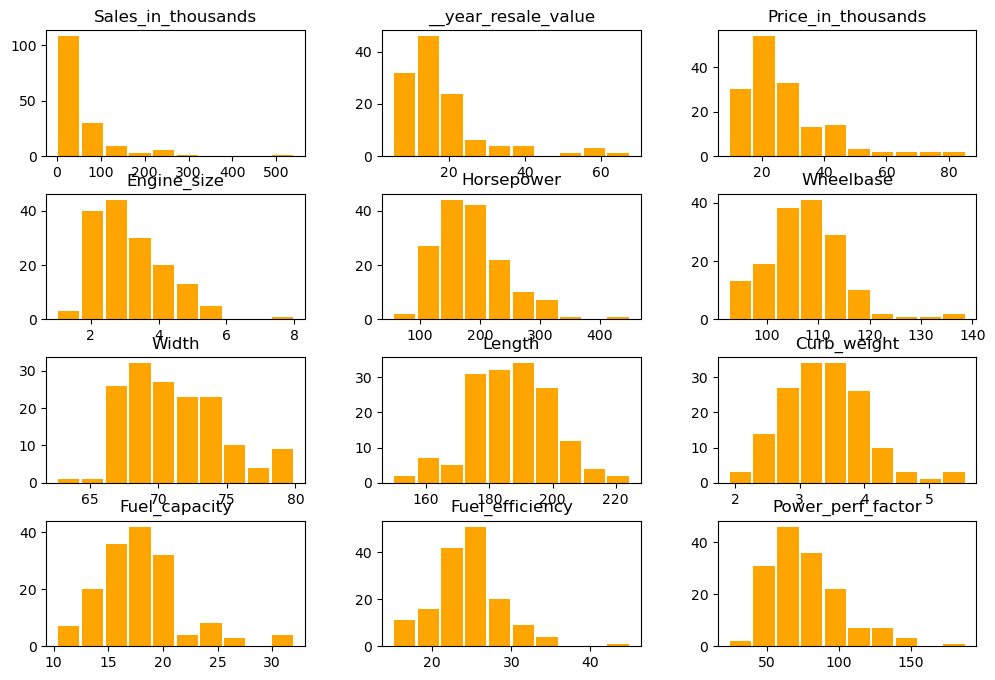

In [866]:
graphs=dataframe.hist(column=continuous_attributes,grid=False, figsize=(12,8), color='orange', zorder=2, rwidth=0.9)
graphs

HW1 Q2 B: Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require ?

Yes there are several values that needed to be taken care of. The histogram plotted helps us to identify them. We can observe that several attributes have high skewness as there are some outlier values. 
We will not be considering those values while trainning the model.
We check the difference between the median and mean in comparission to the min and max of the dataframe. If there is a significant
differnece, then we replace the na values with median ,else we use the mean. This step is a part of the clean process. 
Although i tried with this method, dropping the na values seems to be more appropriate in this scenario as the null or na values for multiple attributes are very less in number.

Solution to Q2 sub question B: 
The key triats observed from the plots are:
1. There are a few attributes that have high skewness. Sales_in_thousands is highly left skewed.
2. Curb_weight and Wheelbase are normally curved.
3. The 'vehicle _type' is not much of importance, we have dropped it.
4. Some outliers were present in 'sales_in_thousands'.
5. Price_in_thousands is to be predicted.

In [867]:
# dataframe['__year_resale_value'].describe() # as this column has some null values, we are filling them with appropriate values.
# dataframe['__year_resale_value'].fillna(dataframe['__year_resale_value'].mean(), inplace=True)

In [868]:
# dataframe['Fuel_efficiency'].describe() # filling the na values as they may alter the values.
# dataframe['Fuel_efficiency'].fillna(dataframe['Fuel_efficiency'].median(), inplace=True)

In [869]:
# dataframe['Price_in_thousands'].describe()
# dataframe['Price_in_thousands'].fillna(dataframe['Price_in_thousands'].mean(), inplace=True)

In [870]:
# dataframe['Curb_weight'].describe()
# dataframe['Curb_weight'].fillna(dataframe['Curb_weight'].mean(), inplace=True)

In [871]:
# dataframe['Power_perf_factor'].describe()
# dataframe['Power_perf_factor'].fillna(dataframe['Power_perf_factor'].median(), inplace=True)

In [872]:
# dataframe['Engine_size'].describe()
# dataframe['Engine_size'].fillna(dataframe['Engine_size'].median(), inplace=True)

In [873]:
# dataframe['Horsepower'].describe()
# dataframe['Horsepower'].fillna(dataframe['Horsepower'].median(), inplace=True)

In [874]:
# dataframe['Wheelbase'].describe()
# dataframe['Wheelbase'].fillna(dataframe['Wheelbase'].median(), inplace=True)

In [875]:
# dataframe['Width'].describe()
# dataframe['Width'].fillna(dataframe['Width'].median(), inplace=True)

In [876]:
# dataframe['Length'].describe()
# dataframe['Length'].fillna(dataframe['Length'].median(), inplace=True)

In [877]:
# dataframe['Fuel_capacity'].describe()
# dataframe['Fuel_capacity'].fillna(dataframe['Fuel_capacity'].median(), inplace=True)
dataframe = dataframe.dropna()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 149
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         117 non-null    object 
 1   Model                117 non-null    object 
 2   Sales_in_thousands   117 non-null    float64
 3   __year_resale_value  117 non-null    float64
 4   Vehicle_type         117 non-null    object 
 5   Price_in_thousands   117 non-null    float64
 6   Engine_size          117 non-null    float64
 7   Horsepower           117 non-null    float64
 8   Wheelbase            117 non-null    float64
 9   Width                117 non-null    float64
 10  Length               117 non-null    float64
 11  Curb_weight          117 non-null    float64
 12  Fuel_capacity        117 non-null    float64
 13  Fuel_efficiency      117 non-null    float64
 14  Latest_Launch        117 non-null    object 
 15  Power_perf_factor    117 non-null    float64


In [878]:
# Correlation with Price_in_thousands
numeric_df = dataframe.select_dtypes(include=[np.number])
df_corr = numeric_df.corr()['Price_in_thousands'][:-1]
df_corr

Sales_in_thousands    -0.251705
__year_resale_value    0.954757
Price_in_thousands     1.000000
Engine_size            0.649170
Horsepower             0.853455
Wheelbase              0.067042
Width                  0.301292
Length                 0.182592
Curb_weight            0.511400
Fuel_capacity          0.406496
Fuel_efficiency       -0.479539
Name: Price_in_thousands, dtype: float64

From the above output we can observe that the columns '__year_resale_value, Horsepower have high correlation. Let's use the pair plot to get more details.


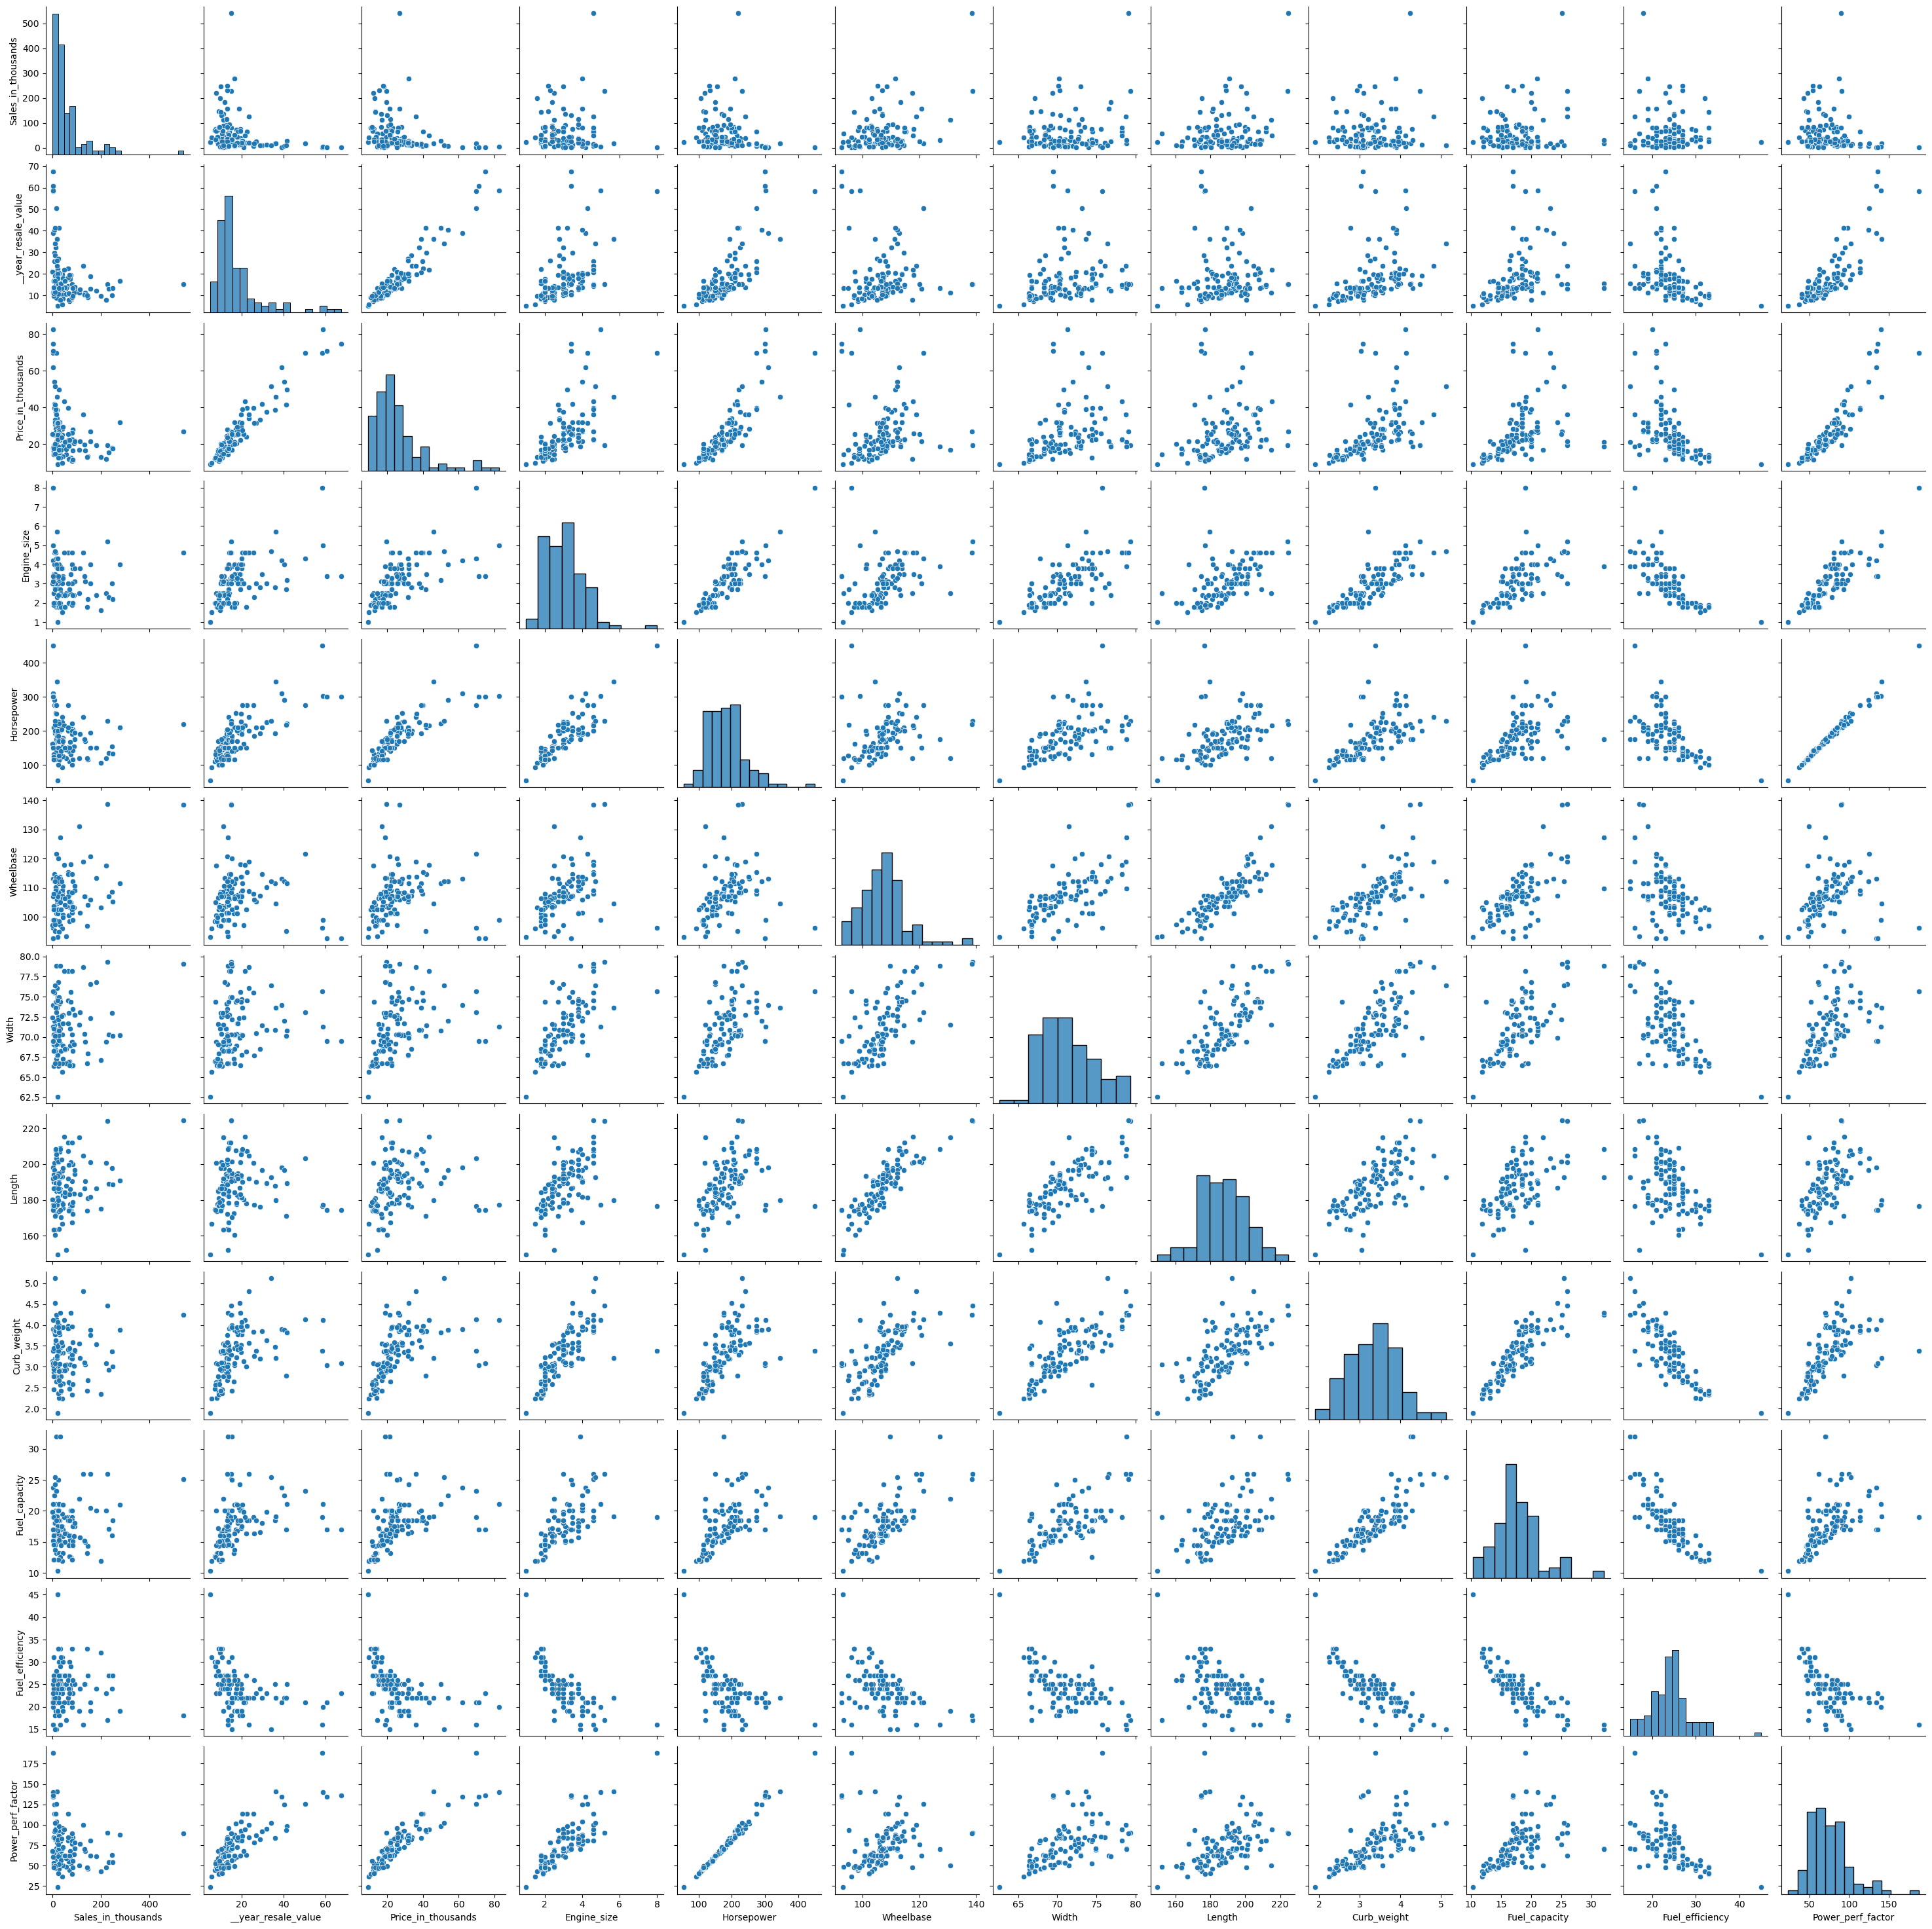

In [879]:
# Correlation using pairplot
import seaborn as sns
sns.pairplot(dataframe, diag_kind="auto")

HW1 Q2 B: EXPLAIN THE NOTICABLE KEY TRIATS :
1. From the above we can observe that the attribute price_in_thousands is highly corellated to power_perf_factor, horsepower and  year_resale_value. 
2. From the pair plot above we can clearly observe the attributes that affect the target value. 
3. The attributes width, sales_in_thousands and length has less corellation and may not be extremely important.
4.  Fuel efficeincy has very negative corellation.
5. All other columns have a positive corellation.

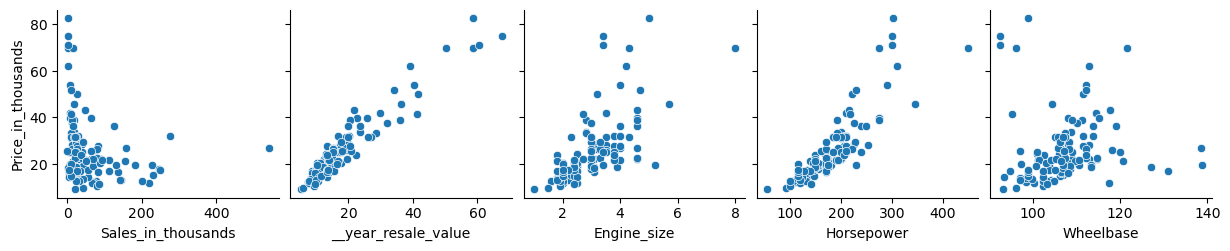

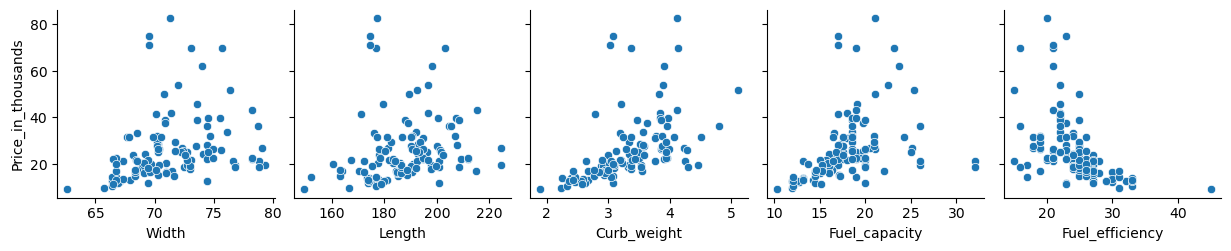

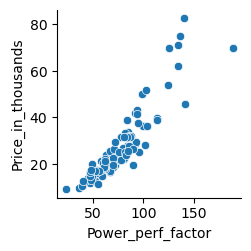

In [880]:
x_vars = [col for col in numeric_df.columns if col != 'Price_in_thousands']

# Plot pairplot
for i in range(0, len(x_vars), 5):
    sns.pairplot(dataframe, y_vars='Price_in_thousands', x_vars=x_vars[i:i+5])

HW1 Q2 C: Analyze the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

"PCC" in the context of "Pearson Correlation Coefficient" (PCC) refers to a measure of the linear correlation between two variables. It is also known as Pearson's r or simply the correlation coefficient. The Pearson correlation coefficient quantifies the strength and direction of the linear relationship between two continuous variables. Let's have a look at how we can plot it.

In [881]:
# Select only numeric columns
numeric_df = dataframe.select_dtypes(include=np.number)

# Calculate Pearson correlation coefficient
pearson_correlation_coef = numeric_df.corr(method='pearson')

HW 1 Q2 C:
Let's draw the heatmap to analyze the relation between the data attributes.

<Axes: >

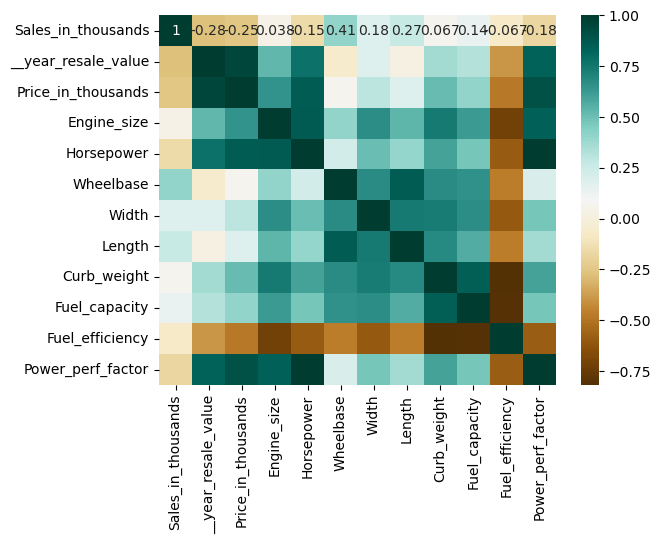

In [882]:
import seaborn as sb
sb.heatmap(pearson_correlation_coef, xticklabels= pearson_correlation_coef.columns, yticklabels=pearson_correlation_coef.columns, cmap='BrBG', annot=True)

<Axes: xlabel='Power_perf_factor', ylabel='Price_in_thousands'>

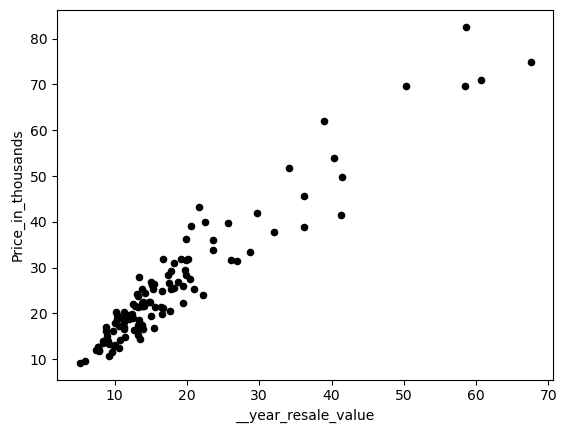

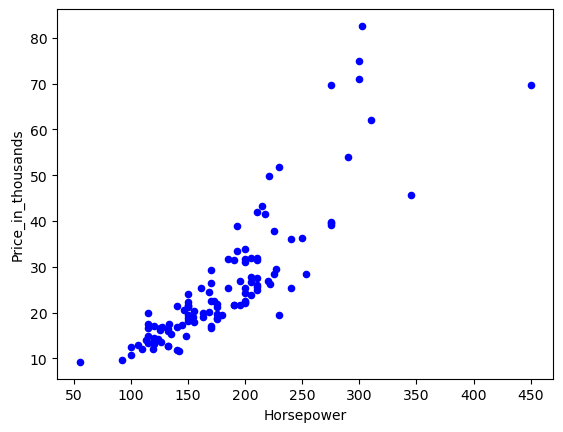

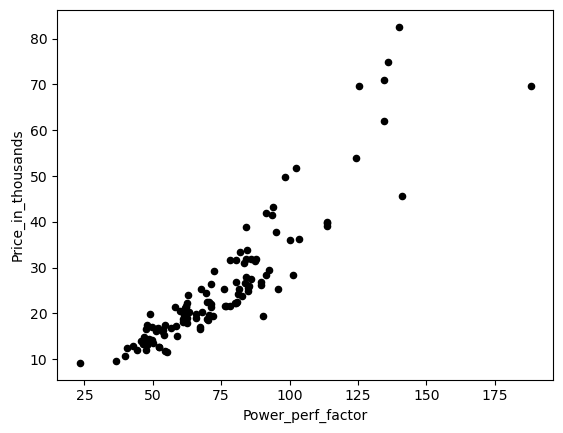

In [883]:
#Plotting the graphs which shows high correlation
dataframe.plot.scatter(x='__year_resale_value', y='Price_in_thousands', c='black')
dataframe.plot.scatter(x='Horsepower', y='Price_in_thousands', c='blue')
dataframe.plot.scatter(x='Power_perf_factor', y='Price_in_thousands', c='black')


In [884]:
#dropping the label and columns which have low correlation with Sales_in_thousands
# dataframe = pd.get_dummies(dataframe, columns=categorical_attributes)
# print(dataframe.shape)
# dataframe.head()
#X = dataframe.drop(['Price_in_thousands'], axis=1)
X = dataframe[['__year_resale_value','Power_perf_factor','Horsepower']]
X.head
y = dataframe['Price_in_thousands']
X.head

<bound method NDFrame.head of      __year_resale_value  Power_perf_factor  Horsepower
0                 16.360          58.280150       140.0
1                 19.875          91.370778       225.0
3                 29.725          91.389779       210.0
4                 22.255          62.777639       150.0
5                 23.555          84.565105       200.0
..                   ...                ...         ...
145               11.425          46.943877       115.0
146               13.240          47.638237       115.0
147               16.725          61.701381       150.0
148               16.575          48.907372       115.0
149               13.760          47.946841       115.0

[117 rows x 3 columns]>

<Axes: xlabel='__year_resale_value', ylabel='Price_in_thousands'>

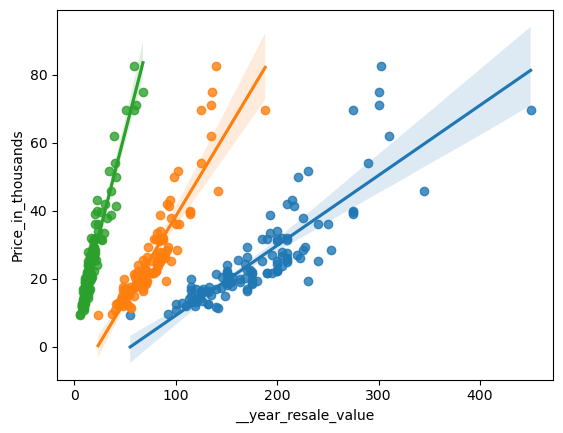

In [885]:
sns.regplot(x='Horsepower', y='Price_in_thousands', data=dataframe)
sns.regplot(x='Power_perf_factor', y='Price_in_thousands', data=dataframe)
sns.regplot(x='__year_resale_value', y='Price_in_thousands', data=dataframe)

HW1 Q2 D:
Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.
Ans: 
we select 20% of the data for testing, I use the train_test_split function from the scikit-learn library in Python, which divides the dataset into training(80 %) and testing sets(20%). Verifying the representativeness of the test portion involves checking the distribution of the target variable, examining feature distributions, comparing summary statistics, and evaluating model performance on the test set. This ensures that the test data accurately reflects the characteristics of the entire dataset, enabling reliable model evaluation and generalization to unseen data

In [886]:

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100) # this function from the sklearn library is used to split the data into trainning and testing. 0.8 means 80 % data is used for training.
model = LinearRegression()
LinRegmodel = model.fit(X_train,y_train)

# prediction for trainning data
y_train_pred = LinRegmodel.predict(X_train)

print(mean_squared_error(y_train, y_train_pred)) #Training MSE
print(r2_score(y_train, y_train_pred)) #Training r2 score
print(LinRegmodel.score(X_train, y_train)) # Model training score

#-------------------------------------------------------------------

# prediction for test data
y_test_pred = LinRegmodel.predict(X_test)

print(mean_squared_error(y_test, y_test_pred)) #Testing MSE
print(r2_score(y_test, y_test_pred)) #Testing r2 score
print(LinRegmodel.score(X_test, y_test)) # Model test score

0.09411751054367944
0.9995497097666953
0.9995497097666953
0.12824155647613042
0.9991306610008159
0.9991306610008159


In [887]:
X.describe()

,__year_resale_value,Power_perf_factor,Horsepower
count,117.000000,117.000000,117.000000
mean,18.031538,74.930921,181.282051
std,11.605632,25.771796,58.591786
min,5.160000,23.276272,55.000000
25%,11.240000,55.297117,140.000000
50%,14.010000,70.660942,175.000000
75%,19.875000,85.828408,210.000000
max,67.550000,188.144323,450.000000


In [888]:
X_test.describe()

,__year_resale_value,Power_perf_factor,Horsepower
count,24.000000,24.000000,24.000000
mean,16.015417,71.930696,175.875000
std,11.492406,20.388370,45.485127
min,7.425000,44.083709,110.000000
25%,12.616250,53.195875,132.000000
50%,14.402500,73.634117,180.000000
75%,15.461250,82.896642,205.000000
max,67.550000,135.914710,300.000000


HW1 Q2 D: 4 Fold cross validation

In [889]:
#KFold cross validation
from sklearn.model_selection import cross_val_score

num_folds = 4 # k value

# Performing 4-fold cross-validation with 'r2' as the evaluation metric
r2_scores = cross_val_score(LinRegmodel, X_train, y_train, scoring='r2', cv=num_folds)
mean_r2_score = np.mean(r2_scores)
print(f'R2: {mean_r2_score:.3f}')

# Performing 4-fold cross-validation with 'neg_mean_squared_error' as the evaluation metric
mse_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=num_folds)
mean_mse_score = -np.mean(mse_scores)
print(f'MSE: {mean_mse_score:.3f}')

R2: 0.999
MSE: 0.105


HW1 Q2 D: Closed Form solution

In [890]:
# Closed Form solution
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression

model = LinearRegression()
LinRegmodel = model.fit(X_train,y_train)

# prediction
y_train_pred = LinRegmodel.predict(X_train)

print(mean_squared_error(y_train, y_train_pred)) #Training MSE
print(r2_score(y_train, y_train_pred)) #Training r2 score
print(LinRegmodel.score(X_train, y_train)) # Model training score

print("---------------------------------------------------")
y_test_pred = LinRegmodel.predict(X_test)

print(mean_squared_error(y_test, y_test_pred)) #Testing MSE
print(r2_score(y_test, y_test_pred)) #Testing r2 score
print(LinRegmodel.score(X_test, y_test)) # Model test score


0.09411751054367944
0.9995497097666953
0.9995497097666953
---------------------------------------------------
0.12824155647613042
0.9991306610008159
0.9991306610008159


HW1 Q2 E:
Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD

In [891]:
#Linear regression with SGD

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Standardizing
scaler = StandardScaler()
Standardized_X_train = scaler.fit_transform(X_train)
Standardized_X_test = scaler.transform(X_test)

SGD = SGDRegressor(loss='squared_error', alpha=0.0001, max_iter=500, random_state=42)

# Training the model on the train data
SGD.fit(X_train, y_train)

# Make predictions
y_prediction = SGD.predict(X_test)

mse_SGD = mean_squared_error(y_test, y_prediction)
r2_SGD = r2_score(y_test, y_prediction)

print(f"Mean Squared Error: {mse_SGD}")
print(f"R-squared: {r2_SGD}")

Mean Squared Error: 6.815090865700514e+26
R-squared: -4.6198942334570657e+24


HW1 Q2 E: 
Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact

In [892]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

#Ridge Regression

ridge = Ridge(alpha=0.01)

ridge.fit(X_train,y_train)

ridge_train_score = ridge.score(X_train, y_train)
ridge_test_score = ridge.score(X_test, y_test)

print("The train score for ridge model is {}".format(ridge_train_score))
print("The test score for ridge model is {}".format(ridge_test_score))

#Lasso Regression

lasso = Lasso(alpha=0.01)

lasso.fit(X_train,y_train)

lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)

print("The train score for Lasso model is {}".format(lasso_train_score))
print("The test score for Lasso model is {}".format(lasso_test_score))

#ElasticNet

elasticNet = ElasticNet(alpha=0.01)

elasticNet.fit(X_train,y_train)

elasticNet_train_score = elasticNet.score(X_train, y_train)
elasticNet_test_score = elasticNet.score(X_test, y_test)

print("The train score for ElasticNet model is {}".format(elasticNet_train_score))
print("The test score for ElasticNet model is {}".format(elasticNet_test_score))

The train score for ridge model is 0.9995497095224796
The test score for ridge model is 0.9991306889650364
The train score for Lasso model is 0.9993785235257105
The test score for Lasso model is 0.9990211678799737
The train score for ElasticNet model is 0.9993702382379338
The test score for ElasticNet model is 0.999016173475402


In [893]:
from sklearn.linear_model import RidgeCV, LassoCV
Alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]

#Fitting RidgeCV model for different penalty values
for i in Alphas:
    Ridge_cv = RidgeCV(alphas = [i]).fit(X_train, y_train)
    print(f"\nRidgeCV Model (alpha = {i})\n")
    print("The train score for RidgeCV model is: ",Ridge_cv.score(X_train, y_train))
    print("The test score for RidgeCV model is: ", Ridge_cv.score(X_test, y_test))


RidgeCV Model (alpha = 0.0001)

The train score for RidgeCV model is:  0.9995497097657853
The test score for RidgeCV model is:  0.9991306568083353

RidgeCV Model (alpha = 0.001)

The train score for RidgeCV model is:  0.9995497097642466
The test score for RidgeCV model is:  0.9991306634213138

RidgeCV Model (alpha = 0.01)

The train score for RidgeCV model is:  0.9995497095224799
The test score for RidgeCV model is:  0.9991306889123246

RidgeCV Model (alpha = 0.1)

The train score for RidgeCV model is:  0.9995496853771167
The test score for RidgeCV model is:  0.9991309224498924

RidgeCV Model (alpha = 1)

The train score for RidgeCV model is:  0.9995473024598486
The test score for RidgeCV model is:  0.9991314829021842

RidgeCV Model (alpha = 10)

The train score for RidgeCV model is:  0.9993374980111145
The test score for RidgeCV model is:  0.9989831589278723


HW1 Q2 E: 
Based on the above output we obserse that the RidgeCV model's performance was evaluated across different alpha values ranging from 0.0001 to 10. As alpha increased, indicating stronger regularization, there was a slight decrease in both train and test scores. We have used the following alpha/penalty values.

In [894]:
#Fitting LassoCV model for different penalty values
for i in Alphas:
    lasso_cv = LassoCV(alphas = [i], random_state=0).fit(X_train, y_train)
    print(f"\nLassoCV Model (alpha = {i})\n")
    print("The train score for LassoCV model is: ",lasso_cv.score(X_train, y_train))
    print("The test score for LassoCV model is: ", lasso_cv.score(X_test, y_test))


LassoCV Model (alpha = 0.0001)

The train score for LassoCV model is:  0.9993911267354535
The test score for LassoCV model is:  0.9990332673103454

LassoCV Model (alpha = 0.001)

The train score for LassoCV model is:  0.9993900019987797
The test score for LassoCV model is:  0.9990321830261079

LassoCV Model (alpha = 0.01)

The train score for LassoCV model is:  0.9993785235257105
The test score for LassoCV model is:  0.9990211678799737

LassoCV Model (alpha = 0.1)

The train score for LassoCV model is:  0.9992406281620212
The test score for LassoCV model is:  0.9988937860427783

LassoCV Model (alpha = 1)

The train score for LassoCV model is:  0.99555140141171
The test score for LassoCV model is:  0.9958975224519645

LassoCV Model (alpha = 10)

The train score for LassoCV model is:  0.9447566030704905
The test score for LassoCV model is:  0.9551336707508


In [895]:
#Fitting ElasticNet model for different penalty values
for i in Alphas:
    Elastic_Net = ElasticNet(alpha = i).fit(X_train, y_train)
    print(f"\nElasticNet Model (alpha = {i})\n")
    print("The train score for ElasticNet model is: ",Elastic_Net.score(X_train, y_train))
    print("The test score for ElasticNet model is: ", Elastic_Net.score(X_test, y_test))


ElasticNet Model (alpha = 0.0001)

The train score for ElasticNet model is:  0.9993910473454135
The test score for ElasticNet model is:  0.9990332201983049

ElasticNet Model (alpha = 0.001)

The train score for ElasticNet model is:  0.9993892049249213
The test score for ElasticNet model is:  0.9990317093105513

ElasticNet Model (alpha = 0.01)

The train score for ElasticNet model is:  0.9993702382379338
The test score for ElasticNet model is:  0.999016173475402

ElasticNet Model (alpha = 0.1)

The train score for ElasticNet model is:  0.999129023808698
The test score for ElasticNet model is:  0.9988203063353007

ElasticNet Model (alpha = 1)

The train score for ElasticNet model is:  0.993537447747314
The test score for ElasticNet model is:  0.9944002849029401

ElasticNet Model (alpha = 10)

The train score for ElasticNet model is:  0.9456892674846682
The test score for ElasticNet model is:  0.9562547871371592


HW1 Q2 F: Repeat everything from part E with polynomial regression. Using validation loss, explore if your model overfits/underfits the data.
VALIDATION LOSS REFERS TO THE MSE IN THIS CASE.

In [896]:
#Polynomial Regression
import math
from sklearn.preprocessing import PolynomialFeatures

x_train, x_valid, Y_train, Y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_valid_scaled = scaler.transform(x_valid)

degr=2
polynomial = PolynomialFeatures(degree=degr)
x_train_poly = polynomial.fit_transform(x_train_scaled)
x_valid_poly = polynomial.transform(x_valid_scaled)

# Training a linear regression model
model = LinearRegression()
model.fit(x_train_poly, Y_train)

# Make predictions on the validation set
Y_pred = model.predict(x_valid_poly)

# Calculate the validation loss (MSE)
mse = mean_squared_error(Y_valid, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"RMSE value is: {math.sqrt(mse)}")
r2 = r2_score(Y_valid, Y_pred)
print(f"R2 Score: {r2}")

Mean Squared Error: 0.2195630418547696
RMSE value is: 0.4685755455150958
R2 Score: 0.9983462921598041


Because I got the high R2 score and low RMSE, I believe that the model is fitting the training data too closely and may not generalize well to new, unseen data. Therefore, it's indicative of overfitting.

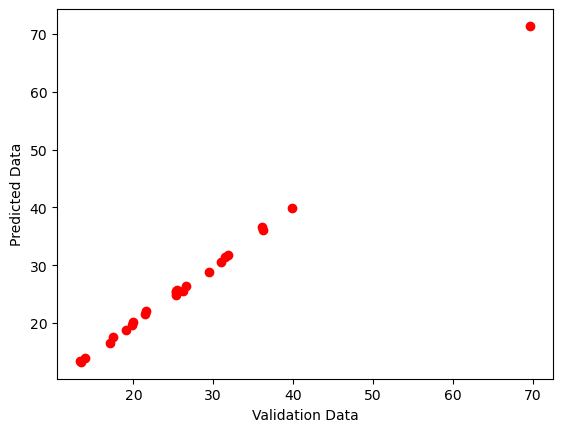

In [897]:
#Plot the polynomial regression
plt.scatter(Y_valid, Y_pred, color = 'red')
plt.xlabel('Validation Data')
plt.ylabel('Predicted Data')
plt.show()


In [898]:
Alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]

#Fitting RidgeCV model for different penalty values
for i in Alphas:
    Ridge_cv = RidgeCV(alphas = [i]).fit(x_train_poly, Y_train)
    print(f"\nRidgeCV Model (alpha = {i})\n")
    print("The train score for RidgeCV model is: ",Ridge_cv.score(x_train_poly, Y_train))
    print("The test score for RidgeCV model is: ", Ridge_cv.score(x_valid_poly, Y_valid))


RidgeCV Model (alpha = 0.0001)

The train score for RidgeCV model is:  0.999649714175339
The test score for RidgeCV model is:  0.9982539739021495

RidgeCV Model (alpha = 0.001)

The train score for RidgeCV model is:  0.9996353264352766
The test score for RidgeCV model is:  0.9980108370050209

RidgeCV Model (alpha = 0.01)

The train score for RidgeCV model is:  0.9993367566644646
The test score for RidgeCV model is:  0.9978416987249122

RidgeCV Model (alpha = 0.1)

The train score for RidgeCV model is:  0.9925590779489795
The test score for RidgeCV model is:  0.9929669527727993

RidgeCV Model (alpha = 1)

The train score for RidgeCV model is:  0.9780208257641358
The test score for RidgeCV model is:  0.9606618955085495

RidgeCV Model (alpha = 10)

The train score for RidgeCV model is:  0.9563007416873921
The test score for RidgeCV model is:  0.8630223708083236


In [899]:
#Fitting LassoCV model for different penalty values
for i in Alphas:
    lasso_cv = LassoCV(alphas = [i], random_state=0).fit(x_train_poly, Y_train)
    print(f"\nLassoCV Model (alpha = {i})\n")
    print("The train score for LassoCV model is: ",lasso_cv.score(x_train_poly, Y_train))
    print("The test score for LassoCV model is: ", lasso_cv.score(x_valid_poly, Y_valid))


LassoCV Model (alpha = 0.0001)

The train score for LassoCV model is:  0.9988000785423687
The test score for LassoCV model is:  0.998374400104316

LassoCV Model (alpha = 0.001)

The train score for LassoCV model is:  0.9986893484296453
The test score for LassoCV model is:  0.9983902167505546

LassoCV Model (alpha = 0.01)

The train score for LassoCV model is:  0.9973095342696282
The test score for LassoCV model is:  0.9959893432131572

LassoCV Model (alpha = 0.1)

The train score for LassoCV model is:  0.973303562941486
The test score for LassoCV model is:  0.9548825564170971

LassoCV Model (alpha = 1)

The train score for LassoCV model is:  0.9500857706631937
The test score for LassoCV model is:  0.892891817282561

LassoCV Model (alpha = 10)

The train score for LassoCV model is:  0.5193403168300244
The test score for LassoCV model is:  0.4975048327805792


In [900]:
#Fitting ElasticNet model for different penalty values
for i in Alphas:
    Elastic_Net = ElasticNet(alpha = i).fit(x_train_poly, y_train)
    print(f"\nElasticNet Model (alpha = {i})\n")
    print("The train score for ElasticNet model is: ",Elastic_Net.score(x_train_poly, y_train))
    print("The test score for ElasticNet model is: ", Elastic_Net.score(x_valid_poly, Y_valid))


ElasticNet Model (alpha = 0.0001)

The train score for ElasticNet model is:  0.09360128378817167
The test score for ElasticNet model is:  -0.07010104394088601

ElasticNet Model (alpha = 0.001)

The train score for ElasticNet model is:  0.09094972266237233
The test score for ElasticNet model is:  -0.02614767388185557

ElasticNet Model (alpha = 0.01)

The train score for ElasticNet model is:  0.07730250183632803
The test score for ElasticNet model is:  0.22712170176630342

ElasticNet Model (alpha = 0.1)

The train score for ElasticNet model is:  0.053702520442155066
The test score for ElasticNet model is:  0.525265272985715

ElasticNet Model (alpha = 1)

The train score for ElasticNet model is:  0.03665130327340682
The test score for ElasticNet model is:  0.4927186709248472

ElasticNet Model (alpha = 10)

The train score for ElasticNet model is:  0.0026218218997421383
The test score for ElasticNet model is:  0.014394402810517626


HW1 Q2 F:
Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.

Linear regression with SGD:

Mean Squared Error: 6.815090865700514e+26
R-squared: -4.6198942334570657e+24

Ridge, Lasso, and Elastic Net:

The train score for Ridge model is 0.9995497095224796
The test score for Ridge model is 0.9991306889650364
The train score for Lasso model is 0.9993785235257105
The test score for Lasso model is 0.9990211678799737
The train score for ElasticNet model is 0.9993702382379338
The test score for ElasticNet model is 0.999016173475402

Polynomial Regression:

Mean Squared Error: 0.2195630418547696
RMSE value is: 0.4685755455150958
R2 Score: 0.9983462921598041

These metrics provide insights into the performance of each model. The SGD regression model performed poorly with extremely high MSE and negative R-squared values, indicating severe overfitting. However, Ridge, Lasso, and ElasticNet models exhibited excellent performance, with high train and test scores close to 1. Polynomial regression also demonstrated strong performance with low MSE, RMSE, and high R2 score, indicating a good fit to the data. To further enhance performance, additional exploration of regularization parameters and feature engineering techniques could be considered. Something like replacing appropriate values for null values. Generating new columns which are formed after careful consideration of dependand attirbutes.

References used to solve the problem:
1. https://medium.com/the-code-monster/split-a-dataset-into-train-and-test-datasets-using-sk-learn-acc7fd1802e0
2. https://www.kaggle.com/datasets/gagandeep16/car-sales
3. https://www.kaggle.com/code/gadigevishalsai/carsalespredictionusingvariousregressionalgorithms
4. ChatGpt 3.5 - used for understanding and resolving certain errors.
5. https://www.youtube.com/watch?v=OS2m0f2gVJ0
6. https://www.kaggle.com/code/rustydigg918/exploratory-data-analysis-on-car-sales-data